## 调查数据集

经过分析，我觉得乘客生还率与下列因素有关:
1. 年龄
2. 性别
3. 船舱等级


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

 
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)
full_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 年龄因素

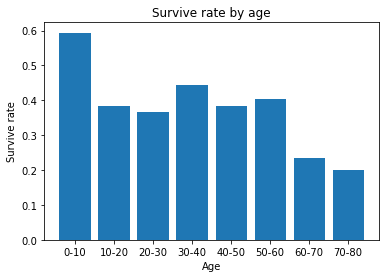

In [2]:
subsection = []
survivals = []

for i in range (0,8):
    subsection.append(full_data.loc[(full_data['Age'] <= (i + 1) * 10) & (full_data['Age'] > i * 10)])
for j in range (0,8):
    if len(subsection[j]) != 0:
        survivals.append(len(subsection[j].loc[full_data['Survived'] == 1])/len(subsection[j]))
    else: 
        survivals.append(0)

view = ['0-10', '10-20','20-30', '30-40','40-50','50-60','60-70', '70-80']
y_pos = np.arange(len(view))
plot.bar(y_pos, survivals)
plot.xticks(y_pos, view)
plot.xlabel('Age')
plot.ylabel('Survive rate')
plot.title('Survive rate by age')
plot.show()

0-10岁的生还率最高，60-80的生还率最低，整体上来讲，生还率随着年龄的增长而变低

## 性别因素

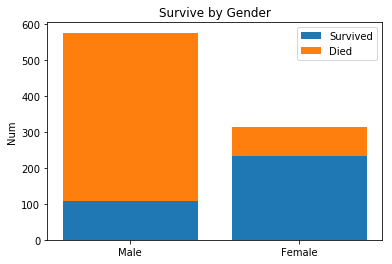

In [3]:
survived = full_data.loc[full_data['Survived'] == 1]
survived_count = len(survived['Name'])
died = full_data.loc[full_data['Survived'] == 0]
died_count = len(died['Name'])

survived_male = survived.loc[survived['Sex'] == 'male']
survived_male_count = len(survived_male['Name'])
died_male = died.loc[died['Sex'] == 'male']
died_male_count = len(died_male['Name'])

survived_female = survived.loc[survived['Sex'] == 'female']
survived_female_count = len(survived_female['Name'])
died_female = died.loc[died['Sex'] == 'female']
died_female_count = len(died_female['Name'])


index = np.arange(2)

p1 = plot.bar(index, (survived_male_count, survived_female_count))
p2 = plot.bar(index, (died_male_count, died_female_count),bottom=(survived_male_count, survived_female_count))
plot.title('Survive by Gender')
plot.ylabel('Num')
plot.xticks(index, ('Male', 'Female'))
plot.legend((p1[0], p2[0]), ('Survived', 'Died'))

plot.show()

显然女性的生还率更高

## 船舱等级因素

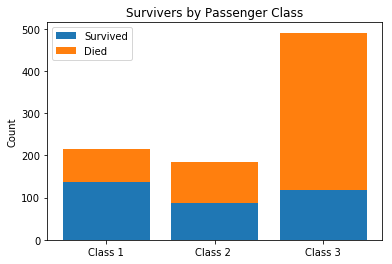

In [4]:
Pclass_1_survived = len(full_data[(full_data['Pclass'] == 1) & (full_data['Survived'] == 1)])
Pclass_1_died = len(full_data[(full_data['Pclass'] == 1) & (full_data['Survived'] == 0)])
Pclass_2_survived = len(full_data[(full_data['Pclass'] == 2) & (full_data['Survived'] == 1)])
Pclass_2_died = len(full_data[(full_data['Pclass'] == 2) & (full_data['Survived'] == 0)])
Pclass_3_survived = len(full_data[(full_data['Pclass'] == 3) & (full_data['Survived'] == 1)])
Pclass_3_died = len(full_data[(full_data['Pclass'] == 3) & (full_data['Survived'] == 0)])

index = np.arange(3)

p1 = plot.bar(index, (Pclass_1_survived, Pclass_2_survived, Pclass_3_survived) )
p2 = plot.bar(index, (Pclass_1_died    , Pclass_2_died    , Pclass_3_died    ), 
              bottom=(Pclass_1_survived, Pclass_2_survived, Pclass_3_survived) )

plot.ylabel('Count')
plot.title('Survivers by Passenger Class')
plot.xticks(index, ('Class 1', 'Class 2 ', 'Class 3'))
plot.legend((p1[0], p2[0]), ('Survived', 'Died'))

plot.show()

显然一等舱二等舱的旅客比三等舱的旅客拥有更高的生还率

## 结论

我假设了有三种因素对生还率有影响，年龄、性别、客舱等级。结论是年龄小的、女性、船舱等级高的人具有更高的生还率。

不足之处，比如891的样本是如何抽取的并不清楚。而且数据本身有缺失。
 